In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [31]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [4]:
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
df.shape

(42000, 785)

In [6]:
df.sample(2)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
27253      7       0       0       0       0       0       0       0       0   
5637       2       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
27253       0  ...         0         0         0         0         0   
5637        0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
27253         0         0         0         0         0  
5637          0         0         0         0         0  

[2 rows x 785 columns]

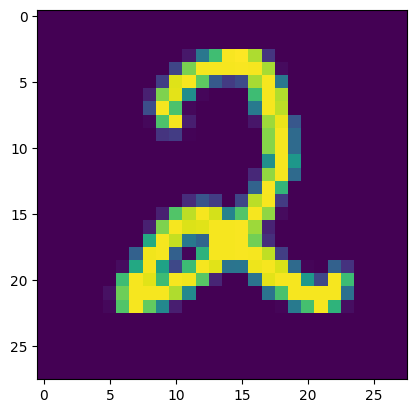

In [7]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[1539, 1:].values.reshape(28,28))

In [32]:
X = df.iloc[:,1:]
y= df.iloc[:,0]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(33600, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()


In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
import time
start=time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

10.821581602096558


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

**PCA**

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [35]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [36]:
X_train_trf= pca.fit_transform(X_train)
X_test_trf= pca.transform(X_test)

In [20]:
X_train_trf.shape

(33600, 200)

In [37]:
knn= KNeighborsClassifier()

In [38]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [39]:
y_pred2= knn.predict(X_test_trf)

In [40]:
accuracy_score(y_test, y_pred2)

0.9503571428571429

In [26]:
for i in range (1,785):
    pca = PCA(n_components=i)
    X_train_trf= pca.fit_transform(X_train)
    X_test_trf= pca.transform(X_test)
    knn= KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred2= knn.predict(X_test_trf)
    print(accuracy_score(y_test, y_pred2))

0.2580952380952381
0.32404761904761903
0.5101190476190476
0.6663095238095238
0.7378571428571429
0.8226190476190476
0.843452380952381
0.8729761904761905
0.8866666666666667
0.9055952380952381
0.9113095238095238
0.9175
0.9284523809523809
0.9355952380952381
0.9389285714285714
0.9383333333333334
0.9408333333333333
0.9407142857142857
0.9420238095238095
0.9447619047619048
0.9442857142857143
0.945
0.9445238095238095
0.945
0.9476190476190476
0.9469047619047619
0.9483333333333334
0.9472619047619047
0.9492857142857143
0.9496428571428571
0.9507142857142857
0.9508333333333333
0.9501190476190476
0.9502380952380952
0.9502380952380952
0.9516666666666667
0.9521428571428572
0.9529761904761904
0.9527380952380953
0.9521428571428572
0.9530952380952381
0.9523809523809523
0.9529761904761904
0.9536904761904762
0.9535714285714286
0.9533333333333334
0.9535714285714286
0.9535714285714286
0.9530952380952381
0.9542857142857143
0.9532142857142857
0.9539285714285715
0.9544047619047619
0.9545238095238096
0.9545238095

In [28]:
#tranforming to 2D coordinate system
pca= PCA(n_components=2)
X_train_trf2=pca.fit_transform(X_train)
X_test_trf2=pca.transform(X_test)


In [29]:
X_train_trf2

array([[-2.71851692, -0.49110191],
       [-0.67722963, -6.75046952],
       [-3.03314415,  6.50869694],
       ...,
       [ 2.14867366,  0.78251258],
       [ 1.05981421,  0.94482036],
       [17.70254057,  1.96262838]])

In [42]:
import plotly.express as px
y_train_trf2= y_train.astype(str)
fig= px.scatter(x=X_train_trf2[:,0],
               y=X_train_trf2[:,1],
               color=y_train_trf2,
               color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [43]:
#tranforming to 3D coordinate system
pca= PCA(n_components=3)
X_train_trf2=pca.fit_transform(X_train)
X_test_trf2=pca.transform(X_test)


In [45]:
X_train_trf2

array([[-2.71864261, -0.48994713,  1.13501662],
       [-0.67693279, -6.75345117, -2.33528132],
       [-3.03321712,  6.50964563,  7.49206408],
       ...,
       [ 2.14886375,  0.78088048, -0.74675415],
       [ 1.05953776,  0.94750254,  3.94883857],
       [17.70257697,  1.96161967, -4.94454685]])

In [47]:
y_train_trf2 = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf2[:,0],
                   y= X_train_trf2[:,1],
                   z=X_train_trf2[:,2],
                   color=y_train_trf2)
fig.update_layout(
margin=dict(l=20, r=20, t=20, b=20))

fig.show()

In [48]:
pca.explained_variance_
#Eigen values

array([40.67111197, 29.17023399, 26.74459589])

In [53]:
pca.components_.shape
#Eigen vectors

(3, 784)

In [50]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [54]:
pca= PCA(n_components=None)
X_train_trf2=pca.fit_transform(X_train)
X_test_trf2=pca.transform(X_test)


In [56]:
pca.explained_variance_.shape

(784,)

In [57]:
pca.components_.shape

(784, 784)

In [58]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [59]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

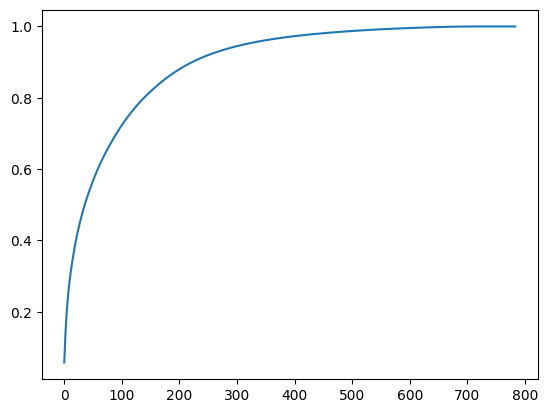

In [60]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))